In [17]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle
from scipy.stats import chi2_contingency

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [18]:
historic_average = 6.3
hurricanes_2005 = 15

# Calculate the probability of observing 14 or fewer hurricanes in a single year
probability_less_than_15 = sum(math.exp(-historic_average) * (historic_average ** k) / math.factorial(k) for k in range(hurricanes_2005))

# Calculate the probability of observing 15 or more hurricanes in a single year
probability_15_or_more = 1 - probability_less_than_15

# Check if the probability is significant (Z score of 2 or larger)
z_score = (hurricanes_2005 - historic_average) / math.sqrt(historic_average)
significance_level = 0.022

if z_score >= 2 or probability_15_or_more <= significance_level:
    print("The number of hurricanes in 2005 is significantly larger than the historic average.")
else:
    print("The number of hurricanes in 2005 is not significantly larger than the historic average.")


The number of hurricanes in 2005 is significantly larger than the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [25]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

mean_pre = np.mean(pre)
mean_post = np.mean(post)

std_pre = np.std(pre, ddof=1)
std_post = np.std(post, ddof=1)

pooled_std = np.sqrt((std_pre**2 + std_post**2) / 2)

n = len(pre)
t_statistic = (mean_post - mean_pre) / (pooled_std * np.sqrt(2/n))

degrees_freedom = 2 * n - 2

p_value = stats.t.sf(np.abs(t_statistic), degrees_freedom) * 2  # two-tailed test

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in blood pressures.")
else:
    print("There is no statistically significant difference in blood pressures.")

#reject the null hypothesis in favor of the alternative hypothesis, 
#concluding that there is a statistically significant difference between the blood pressures before and after exposure to halogen lighting.

T-Statistic: 3.786997938137629
P-Value: 0.00134994183132767
There is a statistically significant difference in blood pressures.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

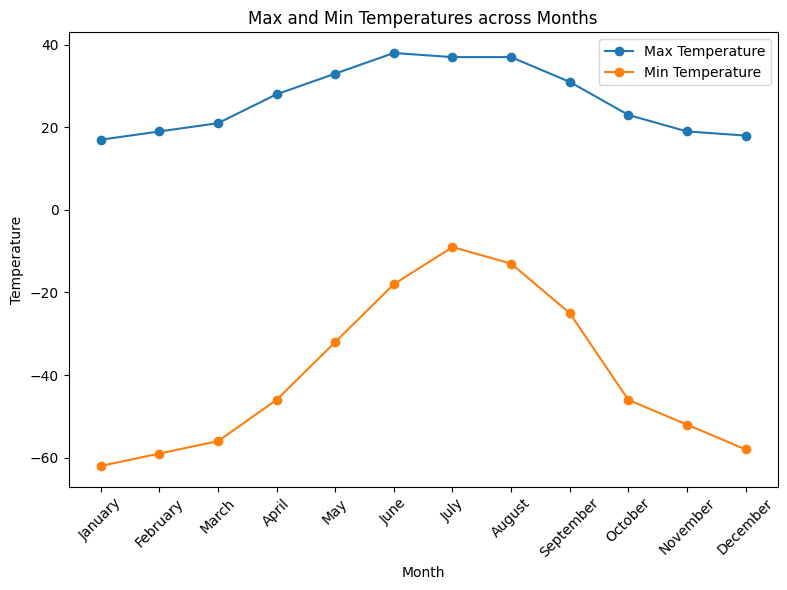

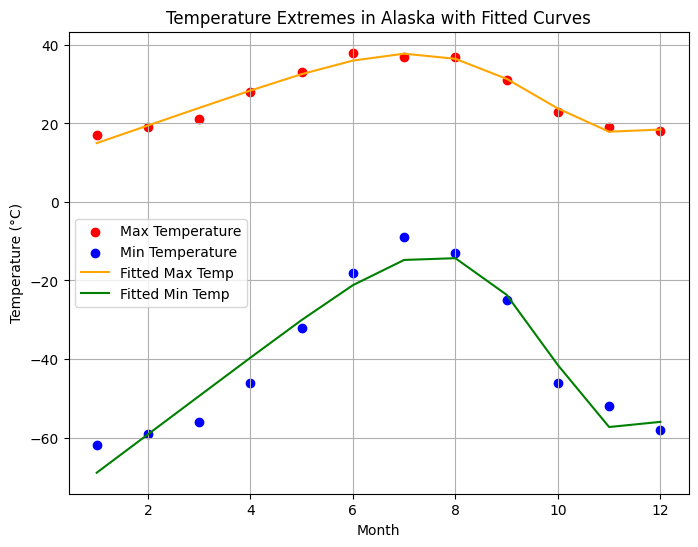

The time offsets for min and max temperatures are similar within the fit accuracy.


In [24]:
max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(8, 6))
plt.plot(months, max, marker='o', label='Max Temperature')
plt.plot(months, min, marker='o', label='Min Temperature')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Max and Min Temperatures across Months')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

months = np.arange(1, 13) 

# Define a combination of Gaussian and linear functions
def gaussian_linear(x, a, b, c, d, e, f):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d * x + e + f

params_max, _ = curve_fit(gaussian_linear, months, max)

params_min, _ = curve_fit(gaussian_linear, months, min)

plt.figure(figsize=(8, 6))
plt.scatter(months, max, color='red', label='Max Temperature')
plt.scatter(months, min, color='blue', label='Min Temperature')

plt.plot(months, gaussian_linear(months, *params_max), color='orange', label='Fitted Max Temp')
plt.plot(months, gaussian_linear(months, *params_min), color='green', label='Fitted Min Temp')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska with Fitted Curves')
plt.legend()
plt.grid(True)
plt.show()

#The fit is ok, but the functions as not smooth which is not desirable because the function is not derivable in the abrupt points. 
#but it is hard to make both functions have a good fit, we should fit the data using different functions. 

offset_max = params_max[1] 
offset_min = params_min[1]

# Check if the time offsets are similar within a certain threshold (e.g., ±1 month)
threshold = 1  # Threshold for time offset comparison (in months)

if abs(offset_max - offset_min) <= threshold:
    print("The time offsets for min and max temperatures are similar within the fit accuracy.")
else:
    print("The time offsets for min and max temperatures differ significantly within the fit accuracy.")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

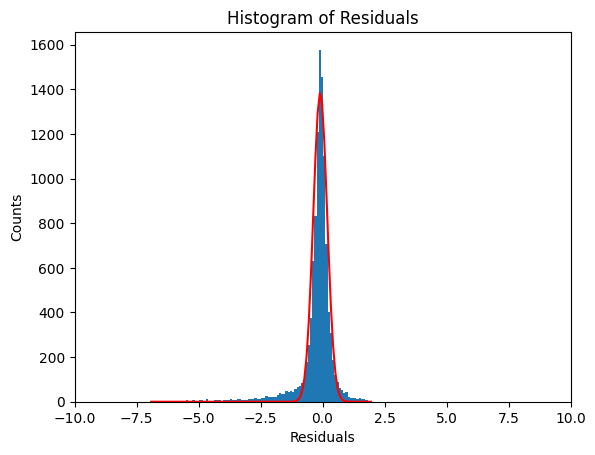

P-value from the chi2 test with 5% significance level: 1.0520919677009894e-228. 
 The fitted function is appropriate: False


In [21]:
filename = "residuals_261.pkl"
with open(filename, 'rb') as infile:
    residuals = pickle.load(infile).item()

df = pd.DataFrame(residuals)
def remove_outliers(data, lower_bound, upper_bound):
    return data[(data >= lower_bound) & (data <= upper_bound)]

without_outliers = remove_outliers(df['residuals'], -7, 2)
n_bins = 100
hist_values, bin_edges, _ = plt.hist(without_outliers, bins=n_bins)
sum_hist = np.sum(hist_values)
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.title('Histogram of Residuals')
plt.xlim(-10, 10)

poisson_uncertainty = np.sqrt(hist_values)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

params, cov_matrix = curve_fit(stats.norm.pdf, bin_centers, hist_values, p0=[0, 1], sigma=poisson_uncertainty)
fitted_values = stats.norm.pdf(bin_centers, *params)*sum_hist
plt.plot(bin_centers, fitted_values * np.diff(bin_edges), label='Fit', color='r')
plt.show()

expected_freqs = stats.norm.pdf(bin_centers, *params) * np.sum(hist_values) * np.diff(bin_edges)
mask = hist_values > 0
chi2_stat, p_val = chi2_contingency([hist_values[mask], expected_freqs[mask]])[:2]
appropriate = p_val >= 0.05 

print(f'P-value from the chi2 test with 5% significance level: {p_val}. \n The fitted function is appropriate: {appropriate}')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

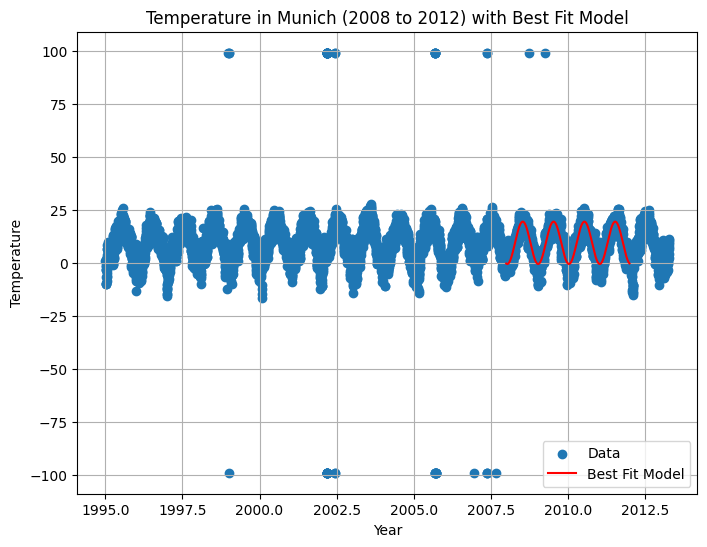

Best Fit Values:
a: -9.988133687955633 ± 0.17961047359790813
b: 12.33302301418607 ± 0.017983052399919847
c: 9.38411486842026 ± 0.12700529107051736
Overall Average Temperature in Munich: 8.941907038598593
Predicted Coldest Daily Average Temperature: 8.60858898368414
Predicted Hottest Daily Average Temperature: 28.043454830353568

Parameter 'b' represents the phase shift of the cosine function. It indicates the offset in time for the cosine wave.


In [23]:
data_url = 'https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt?dl=1'

data = pd.read_csv(data_url, delim_whitespace=True, header=None)
data.columns = ['Year', 'Temperature']

# Filter data for the range 2008 to 2012
filtered_data = data[(data['Year'] >= 2008) & (data['Year'] <= 2012)]

def cosine_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Fit the model to the data
params, cov = curve_fit(cosine_function, filtered_data['Year'], filtered_data['Temperature'])

# Extracting parameter values and uncertainties
a_fit, b_fit, c_fit = params
a_err, b_err, c_err = np.sqrt(np.diag(cov))

overall_avg_temp = data['Temperature'].mean()

# Predictions by the model for coldest and hottest time of the year
coldest_prediction = cosine_function(0, a_fit, b_fit, c_fit) + overall_avg_temp
hottest_prediction = cosine_function(0.5, a_fit, b_fit, c_fit) + overall_avg_temp

plt.figure(figsize=(8, 6))
plt.scatter(data['Year'], data['Temperature'], label='Data')
plt.plot(filtered_data['Year'], cosine_function(filtered_data['Year'], a_fit, b_fit, c_fit), color='red',
         label='Best Fit Model')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature in Munich (2008 to 2012) with Best Fit Model')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Fit Values:")
print(f"a: {a_fit} ± {a_err}")
print(f"b: {b_fit} ± {b_err}")
print(f"c: {c_fit} ± {c_err}")
print(f"Overall Average Temperature in Munich: {overall_avg_temp}")
print(f"Predicted Coldest Daily Average Temperature: {coldest_prediction}")
print(f"Predicted Hottest Daily Average Temperature: {hottest_prediction}")
print("\nParameter 'b' represents the phase shift of the cosine function. "
      "It indicates the offset in time for the cosine wave.")
